# Análisis exploratorio de datos

In [612]:
import pandas as pd
import matplotlib.pyplot as plt

### Clientes.csv

In [613]:
df_clientes = pd.read_csv("Datasets/Clientes.csv",sep=';')
df_clientes

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58,LOMA VERDE,"-58,81850307","-34,30997088",NaN
1,2,Buenos Aires,ANA SAPRIZA,PUEYRREDON Y DUPUY RUTA3 KM 52.500 S/N BÂº LO...,49-7578,61,SANTA ROSA,"-58,73073751","-34,93908311",NaN
2,3,Buenos Aires,FERNANDO LUIS SARALEGUI,CALDERON DE LA BARCA 498,49-3435,15,TORRES,"-59,12794068","-34,43082199",NaN
3,4,Buenos Aires,MANUELA SARASOLA,"RUTA 36 KM 45,500 S/N EL PELIGRO",49-2883,29,RUTA SOL,"-58,14393954","-34,92052706",NaN
4,5,Buenos Aires,MARIO RAÚL SARASUA,492 Y 186 S/N COLONIA URQUIZA,491-4608,34,JOSE MELCHOR ROMERO,"-58,089381","-34,9444471",NaN
...,...,...,...,...,...,...,...,...,...,...
2667,2668,Córdoba,MARIA STELLA RIVAS,CALLE PUBLICA SANTA ELENA COLONIA TIROLESA - ...,4902756,23,COLONIA TIROLESA,"-64,07419272","-31,25881725",NaN
2668,2669,Córdoba,ANA GABRIELA RIVAS,CALLE PUBLICA S/NÂº LA ARCADIA,153580992,28,LA ARCADIA,"-64,07696886","-31,53338396",NaN
2669,2670,Córdoba,JAVIER ALONSO RIVEIRO,AVENIDA LIBERTADOR SAN MARTIN S/NÂº BOUWER,4993041,57,BOUWER,"-64,19298343","-31,55786125",NaN
2670,2671,Córdoba,JUAN MANUEL RODRIGUEZ,CALLE PUBLICA S/NÂ° EL GATEADO BARRIO EL GATE...,152768918,36,EL GATEADO,"-64,11681227","-31,32123448",NaN


In [614]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2672 non-null   int64  
 1   Provincia          2647 non-null   object 
 2   Nombre_y_Apellido  2648 non-null   object 
 3   Domicilio          2630 non-null   object 
 4   Telefono           2637 non-null   object 
 5   Edad               2672 non-null   int64  
 6   Localidad          2647 non-null   object 
 7   X                  2616 non-null   object 
 8   Y                  2618 non-null   object 
 9   col10              0 non-null      float64
dtypes: float64(1), int64(2), object(7)
memory usage: 208.9+ KB


##### Veo que la columna 'col10' es innecesaria y procedo a eliminarla

In [615]:
df_clientes.drop(columns='col10',inplace=True)

##### Procedo a analizar la calidad de los datos:

In [616]:
df_clientes['Provincia'].drop_duplicates()

0                 Buenos Aires
11                         NaN
1881    Ciudad de Buenos Aires
2339                   Córdoba
Name: Provincia, dtype: object

In [617]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2672 non-null   int64 
 1   Provincia          2647 non-null   object
 2   Nombre_y_Apellido  2648 non-null   object
 3   Domicilio          2630 non-null   object
 4   Telefono           2637 non-null   object
 5   Edad               2672 non-null   int64 
 6   Localidad          2647 non-null   object
 7   X                  2616 non-null   object
 8   Y                  2618 non-null   object
dtypes: int64(2), object(7)
memory usage: 188.0+ KB


##### Cambio el tipo de dato de 'X' y 'Y' a float

In [618]:
x = df_clientes['X'].replace(to_replace=r',', value='.', regex=True)
df_clientes['X'] = pd.to_numeric(x)

y = df_clientes['Y'].replace(to_replace=r',', value='.', regex=True)
df_clientes['Y'] = pd.to_numeric(y)

##### Verifico si hay inconsistencias en las coordenadas

In [619]:
df_clientes[['Provincia','Y','X']][df_clientes.Y > 0]

,Provincia,Y,X
70,Buenos Aires,34.750635,58.233705
75,Buenos Aires,34.727147,58.249987
79,Buenos Aires,34.715094,58.272408
81,Buenos Aires,34.731272,58.287398
89,Buenos Aires,34.758737,58.272358
130,Buenos Aires,34.861533,57.890342
132,Buenos Aires,34.717865,58.311745
136,Buenos Aires,34.714217,58.290692
168,Buenos Aires,34.466226,58.522167
229,Buenos Aires,34.654437,58.636645


##### Veo que sí hay inconsistencia en las coordenadas y procedos a corregir

In [620]:
df_clientes['X'][df_clientes.X > 0] = df_clientes['X'][df_clientes.X > 0] * -1
df_clientes['Y'][df_clientes.Y > 0] = df_clientes['Y'][df_clientes.Y > 0] * -1

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_6500\2661672506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clientes['X'][df_clientes.X > 0] = df_clientes['X'][df_clientes.X > 0] * -1
C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_6500\2661672506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clientes['Y'][df_clientes.Y > 0] = df_clientes['Y'][df_clientes.Y > 0] * -1


In [621]:
print(df_clientes['Y'][df_clientes.Y > 0])
print(df_clientes['X'][df_clientes.X > 0])

Series([], Name: Y, dtype: float64)
Series([], Name: X, dtype: float64)


In [622]:
df_clientes.columns

Index(['ID', 'Provincia', 'Nombre_y_Apellido', 'Domicilio', 'Telefono', 'Edad',
       'Localidad', 'X', 'Y'],
      dtype='object')

##### Cambio los nombres de las columnas 'X' y 'Y' a 'Latitud' y 'Longitud'

In [623]:
df_clientes['Longitud'] = df_clientes['Y']
df_clientes['Latitud'] = df_clientes['X']
df_clientes.drop(columns=['X','Y'],inplace=True)

##### Añado la columna Rango_Etario

In [624]:
df_clientes['Rango_Etario'] = '-'
df_clientes['Rango_Etario'][df_clientes.Edad <= 30] = '1_Hasta 30 años'
df_clientes['Rango_Etario'][(df_clientes.Edad <= 40) & (df_clientes.Rango_Etario == '-')] = '2_De 31 a 40 años'
df_clientes['Rango_Etario'][(df_clientes.Edad <= 50) & (df_clientes.Rango_Etario == '-')] = '3_De 41 a 50 años'
df_clientes['Rango_Etario'][(df_clientes.Edad <= 60) & (df_clientes.Rango_Etario == '-')] = '4_De 51 a 60 años'
df_clientes['Rango_Etario'][(df_clientes.Edad > 60) & (df_clientes.Rango_Etario == '-')] = '5_Desde 60 años'
df_clientes

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_6500\2690447073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clientes['Rango_Etario'][df_clientes.Edad <= 30] = '1_Hasta 30 años'
C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_6500\2690447073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clientes['Rango_Etario'][(df_clientes.Edad <= 40) & (df_clientes.Rango_Etario == '-')] = '2_De 31 a 40 años'
C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_6500\2690447073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,Longitud,Latitud,Rango_Etario
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58,LOMA VERDE,-34.309971,-58.818503,4_De 51 a 60 años
1,2,Buenos Aires,ANA SAPRIZA,PUEYRREDON Y DUPUY RUTA3 KM 52.500 S/N BÂº LO...,49-7578,61,SANTA ROSA,-34.939083,-58.730738,5_Desde 60 años
2,3,Buenos Aires,FERNANDO LUIS SARALEGUI,CALDERON DE LA BARCA 498,49-3435,15,TORRES,-34.430822,-59.127941,1_Hasta 30 años
3,4,Buenos Aires,MANUELA SARASOLA,"RUTA 36 KM 45,500 S/N EL PELIGRO",49-2883,29,RUTA SOL,-34.920527,-58.143940,1_Hasta 30 años
4,5,Buenos Aires,MARIO RAÚL SARASUA,492 Y 186 S/N COLONIA URQUIZA,491-4608,34,JOSE MELCHOR ROMERO,-34.944447,-58.089381,2_De 31 a 40 años
...,...,...,...,...,...,...,...,...,...,...
2667,2668,Córdoba,MARIA STELLA RIVAS,CALLE PUBLICA SANTA ELENA COLONIA TIROLESA - ...,4902756,23,COLONIA TIROLESA,-31.258817,-64.074193,1_Hasta 30 años
2668,2669,Córdoba,ANA GABRIELA RIVAS,CALLE PUBLICA S/NÂº LA ARCADIA,153580992,28,LA ARCADIA,-31.533384,-64.076969,1_Hasta 30 años
2669,2670,Córdoba,JAVIER ALONSO RIVEIRO,AVENIDA LIBERTADOR SAN MARTIN S/NÂº BOUWER,4993041,57,BOUWER,-31.557861,-64.192983,4_De 51 a 60 años
2670,2671,Córdoba,JUAN MANUEL RODRIGUEZ,CALLE PUBLICA S/NÂ° EL GATEADO BARRIO EL GATE...,152768918,36,EL GATEADO,-31.321234,-64.116812,2_De 31 a 40 años


### Clientes_v2.csv

In [625]:
df_clientes_v2 = pd.read_csv('Datasets/Clientes_v2.csv',sep=';')
df_clientes_v2.sample(7)

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
464,3137,Santa Fe,GUSTAVO BORSARI,CATAMARCA 1093 LOS NARANJOS,4710379,58,GRANADERO BAIGORRIA,"-60,6987612","-32,8627233",NaN
488,3161,Santa Fe,WALTER HUGO BURELLA,SAENZ 285 CENTRO,4710336,56,GRANADERO BAIGORRIA,"-60,70710744","-32,86370646",NaN
130,2803,Mendoza,GUSTAVO DANIEL BERNINI,A.MU.P.POL II ENTRE SAN ROQUE Y PEDRO VASTA,156956876,63,SAN ROQUE,"-68,5623729","-33,01184831",NaN
711,3384,Tucumán,MIGUEL RAMON RODRIGUEZ,RUTA 157 - KM 12 LOS AGUIRRE (SOBRE RUTA 157...,NaN,45,LOS AGUIRRE,"-65,23332927","-26,90608137",NaN
471,3144,Santa Fe,ALBERTO RAUL BRECCIA,CATAMARCA 586 TALLERES CATAMARCA 582,4961039,48,ROLDAN,"-60,90018","-32,90159",NaN
240,2913,Mendoza,JORGE WILLIAM DUBROCCA,AV.BOULOGNE SUR MER 2136 SEXTA SECCION,4234400-INT264,39,MENDOZA,"-68,85935424","-32,8744995",NaN
453,3126,Santa Fe,ALBERTO GUSTAVO BOIX,PEDRO LINO FUNES 1274 AZCUENAGA,4727588,47,ROSARIO,"-60,70099896","-32,94532485",NaN


In [626]:
df_clientes_v2.describe()

,ID,Edad,col10
count,735.000000,735.000000,0.0
mean,3040.000000,40.976871,NaN
std,212.320512,14.456861,NaN
min,2673.000000,15.000000,NaN
25%,2856.500000,29.000000,NaN
50%,3040.000000,42.000000,NaN
75%,3223.500000,54.000000,NaN
max,3407.000000,65.000000,NaN


##### Elimino la columna 'col10' y cambio el tipo de dato de las columnas 'X' y 'Y'

In [627]:
df_clientes_v2.drop(columns='col10',inplace=True)

x = df_clientes_v2['X'].replace(to_replace=r',', value='.', regex=True)
df_clientes_v2['X'] = pd.to_numeric(x)

y = df_clientes_v2['Y'].replace(to_replace=r',', value='.', regex=True)
df_clientes_v2['Y'] = pd.to_numeric(y)

In [628]:
df_clientes_v2.describe()

,ID,Edad,X,Y
count,735.000000,735.000000,729.000000,729.000000
mean,3040.000000,40.976871,-65.251923,-32.346598
std,212.320512,14.456861,5.018688,4.901017
min,2673.000000,15.000000,-71.495020,-68.838539
25%,2856.500000,29.000000,-68.814110,-32.986425
50%,3040.000000,42.000000,-65.264494,-32.915130
75%,3223.500000,54.000000,-60.730026,-32.742965
max,3407.000000,65.000000,-26.738244,-26.594963


##### Cambio los nombres de las columnas 'X' y 'Y' a 'Latitud' y 'Longitud'

In [629]:
df_clientes_v2['Longitud'] = df_clientes_v2['Y']
df_clientes_v2['Latitud'] = df_clientes_v2['X']

df_clientes_v2.drop(columns=['X','Y'])

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,Longitud,Latitud
0,2673,Córdoba,LUISA JACQUELINE RODRIGUEZ,CALLE PUBLICA S/NÂº CNO.PAJAS BLANCAS KM.22 P...,NaN,39,PAJAS BLANCAS,-31.215987,-64.274723
1,2674,NaN,ALFREDO ALBERTO RUIZ,CALLE PUBLICA S/NÂº LA PUERTA P/RUTA PROV.74A,15647073,54,NaN,-31.164950,-64.067189
2,2675,Córdoba,FLAVIO DIAZ,CALLE PUBLICA S/NÂº EL ALGODONAL P/AGUA DE ORO,493844,39,AGUA DE ORO,-31.062102,-64.310213
3,2676,Córdoba,WALTER RUIZ,CALLE PUBLICA S/NÂº RUTA A 74 KM 27,4902949,15,COLONIA TIROLESA,-31.228277,-64.067593
4,2677,Córdoba,MARCELA ROGALO,CALLE PUBLICA CNO. CHACRA DE LA MERCED - KM.18,4918549DIR,46,VILLA CORAZON DE MARIA,-31.445175,-63.997324
...,...,...,...,...,...,...,...,...,...
730,3403,Tucumán,EDMUNDO ROSELLI,CAMINO DE LAS LANZAS Y SAN MARTIN,NaN,64,CAÑADA DE YERBA BUENA,-26.832451,-65.296801
731,3404,Tucumán,GERARDO MANUEL ROSENDO,RUTA 306- KM. 07 PACARA PINTADO,NaN,26,PACARA PINTADO,-26.882212,-65.181107
732,3405,Tucumán,JOSE LUIS RUOCCO,EL TALAR,4301318,21,EL TALAR,-26.802963,-65.108517
733,3406,Tucumán,ANA MARIA SALVERAGLIO,GRAL. SAN MARTIN MANZANA 3,NaN,62,LOS NOGALES,-26.712922,-65.218737


In [630]:
df_clientes_v2[['Provincia','Localidad','X','Y']].sample(10)

,Provincia,Localidad,X,Y
287,Mendoza,MONTECASEROS,-68.512635,-33.104062
628,NaN,NaN,-65.257593,-26.736999
245,Mendoza,SAN FRANCISCO DEL MONTE (GODOY CRUZ),-68.827446,-32.940096
334,Neuquén,SAN MARTIN DE LOS ANDES,NaN,NaN
360,Neuquén,CHIQUILIHUIN (RAI),-71.187484,-39.643676
44,Mendoza,MENDOZA,-68.848699,-32.868546
497,Santa Fe,ROSARIO,-60.694468,-32.940053
305,Mendoza,BARRANCAS,-68.751677,-33.068747
265,Mendoza,FRAY LUIS BELTRAN,-68.612996,-32.960692
402,Santa Fe,ROSARIO,-60.655532,-32.970308


In [631]:
df_clientes_v2['Provincia'].drop_duplicates()

0         Córdoba
1             NaN
11     Entre Ríos
16        Mendoza
323       Neuquén
362      Santa Fe
577       Tucumán
Name: Provincia, dtype: object

### Compra.csv

In [632]:
df_compra = pd.read_csv('Datasets/Compra.csv')
df_compra.sample(7)

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
1570,1571,11/27/2015,2015,1,201501,42903,3,202.74,9
4627,4628,8/25/2017,2017,8,201708,42836,5,58705.00,3
10556,10557,8/28/2020,2020,8,202008,42810,1,934.27,12
7690,7691,4/26/2019,2019,4,201904,42988,14,364.33,12
8046,8047,7/26/2019,2019,7,201907,42859,1,432.00,8
7388,7389,2/22/2019,2019,2,201902,42987,7,306.32,1
10611,10612,8/28/2020,2020,8,202008,43014,4,364.67,11


In [633]:
df_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdCompra       11539 non-null  int64  
 1   Fecha          11539 non-null  object 
 2   Fecha_Año      11539 non-null  int64  
 3   Fecha_Mes      11539 non-null  int64  
 4   Fecha_Periodo  11539 non-null  int64  
 5   IdProducto     11539 non-null  int64  
 6   Cantidad       11539 non-null  int64  
 7   Precio         11172 non-null  float64
 8   IdProveedor    11539 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 811.5+ KB


##### Elimino columnas innecesarias

In [634]:
df_compra.drop(columns=['Fecha_Año','Fecha_Mes','Fecha_Periodo'],inplace=True)

##### Cambio tipo el tipo de dato de la columna Fecha

In [635]:
df_compra['Fecha'] = pd.to_datetime(df_compra['Fecha'])

In [636]:
df_compra.sample(8)

,IdCompra,Fecha,IdProducto,Cantidad,Precio,IdProveedor
2168,2169,2016-03-25,42819,15,601.21,9
3987,3988,2017-03-31,43008,3,269.27,13
2546,2547,2016-05-27,42927,2,66.00,14
8624,8625,2019-10-25,42930,11,96.53,8
6441,6442,2018-08-31,42825,7,364.19,13
6151,6152,2018-06-29,42823,2,615.51,13
3202,3203,2016-10-28,42968,6,2748.77,6
10873,10874,2020-09-25,42801,4,2118.50,13


##### Procedo a ver si hay outliers

In [637]:
df_compra[['Cantidad','Precio']].describe()

,Cantidad,Precio
count,11539.000000,1.117200e+04
mean,8.826415,3.613647e+03
std,6.412074,1.006630e+05
min,1.000000,1.860000e+00
25%,4.000000,3.068300e+02
50%,7.000000,4.634850e+02
75%,12.000000,1.260322e+03
max,54.000000,1.044580e+07


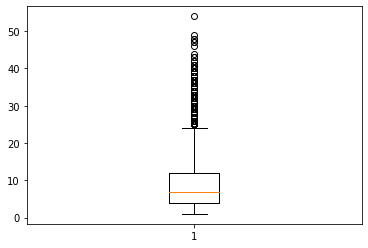

In [638]:
plt.boxplot(df_compra['Cantidad'])
plt.show()

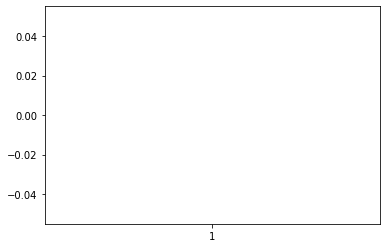

In [639]:
plt.boxplot(df_compra['Precio'])
plt.show()

### Gasto.csv

In [640]:
df_gasto = pd.read_csv('Datasets/Gasto.csv')
df_gasto.sample(8)

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto
3246,3247,1,3,2017-04-01,110.11
5745,5746,30,2,2018-12-01,333.91
3640,3641,10,1,2017-07-01,1048.48
1868,1869,12,1,2016-04-01,1066.79
2655,2656,3,4,2016-11-01,1144.16
5943,5944,21,4,2019-02-01,1058.37
7203,7204,18,4,2020-01-01,1093.15
7093,7094,3,2,2019-12-01,321.58


In [641]:
df_gasto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IdGasto      8640 non-null   int64  
 1   IdSucursal   8640 non-null   int64  
 2   IdTipoGasto  8640 non-null   int64  
 3   Fecha        8640 non-null   object 
 4   Monto        8640 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 337.6+ KB


In [642]:
df_gasto['Fecha'] = pd.to_datetime(df_gasto['Fecha'])

In [643]:
df_gasto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   IdGasto      8640 non-null   int64         
 1   IdSucursal   8640 non-null   int64         
 2   IdTipoGasto  8640 non-null   int64         
 3   Fecha        8640 non-null   datetime64[ns]
 4   Monto        8640 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 337.6 KB


##### Miro si hay outliers

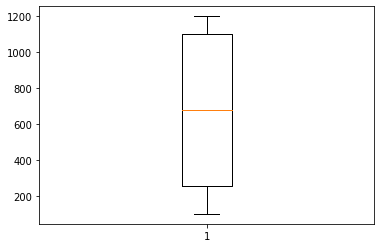

In [644]:
plt.boxplot(df_gasto['Monto'])
plt.show()

### Localidades.csv

In [645]:
df_localidades = pd.read_csv('Datasets/Localidades.csv')
df_localidades.sample(8)

,categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,id,localidad_censal_id,localidad_censal_nombre,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre
1728,Localidad simple,-27.818154,-61.381566,22043.0,Fray Justo Santa María de Oro,INDEC,22043030000,22043030,Venados Grandes,220119.0,Chorotis,VENADOS GRANDES,22,Chaco
3061,Localidad simple,-26.202957,-65.946796,66021.0,Cafayate,INDEC,66021020000,66021020,Tolombón,660056.0,Cafayate,TOLOMBOM,66,Salta
2056,Localidad simple,-31.733673,-58.634038,30113.0,Villaguay,INDEC,30113030000,30113030,Jubileo,NaN,NaN,JUBILEO,30,Entre Ríos
1835,Entidad,-45.831828,-67.491710,26021.0,Escalante,INDEC,26021030022,26021030,Comodoro Rivadavia,260049.0,Comodoro Rivadavia,KM. 3 - GENERAL MOSCONI,26,Chubut
1146,Entidad,-31.306715,-64.170325,14021.0,Colón,INDEC,14021310001,14021310,Parque Norte - Ciudad de los Niños - Villa Pas...,140105.0,Estación Juárez Celman,GUIÑAZU NORTE,14,Córdoba
1865,Localidad simple,-43.866305,-69.044887,26070.0,Paso de Indios,INDEC,26070030000,26070030,Paso de Indios,265021.0,Paso de Indios,PASO DE INDIOS,26,Chubut
3152,Localidad simple,-23.250027,-64.244506,66126.0,Orán,INDEC,66126030000,66126030,El Tabacal,660301.0,Hipólito Yrigoyen,EL TABACAL,66,Salta
3456,Entidad,-31.229698,-61.610104,82021.0,Castellanos,INDEC,82021290002,82021290,Presidente Roca,822315.0,Presidente Roca,PRESIDENTE ROCA,82,Santa Fe


##### Verifico que las coordenadas estén bien

In [646]:
print(df_localidades['centroide_lon'][df_localidades.centroide_lon > 0])
print(df_localidades['centroide_lat'][df_localidades.centroide_lat > 0])

Series([], Name: centroide_lon, dtype: float64)
Series([], Name: centroide_lat, dtype: float64)


##### Renombro las columnas de las coordenadas

In [647]:
df_localidades.rename(columns={'centroide_lon':'Longitud','centroide_lat':'Latitud'},inplace=True)

### Proveedores.csv

In [648]:
df_proveedores = pd.read_csv('Datasets/Proveedores.csv',encoding='latin1')
df_proveedores.sample(8)

,IDProveedor,Nombre,Address,City,State,Country,departamen
10,11,Via Chile Containers,VICEALTE O CONNOR 847,SAN CARLOS DE BARILOCHE,RIO NEGRO,ARGENTINA,BARILOCHE
11,12,Central Rosario SRL,SAN MARTIN 4816,ROSARIO,SANTA FE,ARGENTINA,ROSARIO
13,14,Río Full Net,BELGRANO 244,MONTEROS,TUCUMAN,ARGENTINA,MONTEROS
8,9,Via Chile Containers,JUAN B. JUSTO 415,MENDOZA,MENDOZA,ARGENTINA,CAPITAL
6,7,Fletes y Logistica,SANTA ROSA 1564,CORDOBA,CORDOBA,ARGENTINA,CAPITAL
9,10,Full Toner,CORDOBA 246,MENDOZA,MENDOZA,ARGENTINA,CAPITAL
2,3,Bell S.A.,MORENO 331,CAMPANA,BUENOS AIRES,ARGENTINA,CAMPANA
4,5,Laprida Computacion,AVDA. PEDRO PEREYRA 1339,LAPRIDA,BUENOS AIRES,ARGENTINA,LAPRIDA


##### Renombro algunas columnas

In [649]:
df_proveedores.rename(columns={'Address':'Domicilio','City':'Ciudad','State':'Provincia','Country':'Pais','departamen':'Localidad'},inplace=True)

##### Cambio los registros de de algunas columnas de letras mayúsculas, a sólo la primera letra mayúscula

In [650]:
df_proveedores.Ciudad = df_proveedores['Ciudad'].str.capitalize()
df_proveedores.Provincia = df_proveedores['Provincia'].str.capitalize()
df_proveedores.Pais = df_proveedores['Pais'].str.capitalize()
df_proveedores.Localidad = df_proveedores['Localidad'].str.capitalize()

In [651]:
df_proveedores

,IDProveedor,Nombre,Domicilio,Ciudad,Provincia,Pais,Localidad
0,1,NaN,BEREGUESTEIN 36,Avellaneda,Buenos aires,Argentina,Avellaneda
1,2,San Cirano,ALBERTI 965,Coronel brandsen,Buenos aires,Argentina,Brandsen
2,3,Bell S.A.,MORENO 331,Campana,Buenos aires,Argentina,Campana
3,4,Rivero Insumos,PTE. PERON 3872,Valentin alsina,Buenos aires,Argentina,Lanus
4,5,Laprida Computacion,AVDA. PEDRO PEREYRA 1339,Laprida,Buenos aires,Argentina,Laprida
5,6,Importadora Mann Kloss,LOPE DE VEGA 2102,Boca de atencion monte castro,Caba,Argentina,Comuna 10
6,7,Fletes y Logistica,SANTA ROSA 1564,Cordoba,Cordoba,Argentina,Capital
7,8,NaN,SANTA ROSA 1564,Cordoba,Cordoba,Argentina,Capital
8,9,Via Chile Containers,JUAN B. JUSTO 415,Mendoza,Mendoza,Argentina,Capital
9,10,Full Toner,CORDOBA 246,Mendoza,Mendoza,Argentina,Capital


### Sucursales.csv

In [652]:
df_sucursales = pd.read_csv('Datasets/Sucursales.csv',sep=';')
df_sucursales.sample(8)

,ID,Sucursal,Direccion,Localidad,Provincia,Latitud,Longitud
8,9,Deposito,Pedernera 530,Cap. Federal,Buenos Aires,"-34,6351340","-58,4615130"
13,14,Moron,Salta 250,Moron,Buenos Aires,"-34,6458960","-58,6211490"
1,2,Palermo 1,Guatemala 5701,CABA,CABA,"-34,5790350","-58,4335660"
14,15,Castelar,Sta Rosa 1845,Castelar,Provincia de Buenos Aires,"-34,6393040","-58,6556710"
16,17,Lanus,Pres. Tte. Gral. Juan Domingo Perón 3270,Lanus,Prov de Bs As.,"-34,6698050","-58,4113120"
3,4,Corrientes,Av. Corrientes 2352,Ciudad de Buenos Aires,Bs As,"-34,6046850","-58,3987640"
28,29,Mendoza1,Gutiérrez 349,Mendoza,Mendoza,"-32,8875310","-68,8433080"
27,28,Tucumán,Av. Sarmiento 525,San Miguel de Tucumán,Tucumán,"-26,8180450","-65,2040710"


In [653]:
df_sucursales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         31 non-null     int64 
 1   Sucursal   31 non-null     object
 2   Direccion  31 non-null     object
 3   Localidad  31 non-null     object
 4   Provincia  31 non-null     object
 5   Latitud    31 non-null     object
 6   Longitud   31 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


##### Cambio el tipo de dato de Latitud y Longitud y miro si hay inconsistencias en sus datos

In [654]:
df_sucursales['Latitud'].replace(',','.',regex=True,inplace=True)
df_sucursales['Latitud'] = pd.to_numeric(df_sucursales['Latitud'])

df_sucursales['Longitud'].replace(',','.',regex=True,inplace=True)
df_sucursales['Longitud'] = pd.to_numeric(df_sucursales['Longitud'])

In [655]:
print(df_sucursales['Latitud'][df_sucursales.Latitud > 0])
print(df_sucursales['Longitud'][df_sucursales.Longitud > 0])

Series([], Name: Latitud, dtype: float64)
Series([], Name: Longitud, dtype: float64)


In [656]:
df_sucursales.sample(8)

,ID,Sucursal,Direccion,Localidad,Provincia,Latitud,Longitud
7,8,Alberdi,Av. Juan Bautista Alberdi 1634,Cap. Fed.,Buenos Aires,-34.627306,-58.451498
30,31,Bariloche,Mitre 252,San Carlos de Bariloche,Río Negro,-41.133828,-71.306365
4,5,Almagro,Venezuela 3650,Capital,Bs.As.,-34.617308,-58.416179
3,4,Corrientes,Av. Corrientes 2352,Ciudad de Buenos Aires,Bs As,-34.604685,-58.398764
22,23,Rosario1,Av. Pellegrini 1138,Rosario,Santa Fe,-32.957030,-60.641354
17,18,Avellaneda,Av. Bartolomé Mitre 612,Avellaneda,Buenos Aires,-34.661060,-58.366515
24,25,Córdoba Centro,Av Colón 251,Córdoba,Córdoba,-31.412747,-64.186458
29,30,Mendoza2,Av. Colón 255,Mendoza,Mendoza,-32.894292,-68.843802


### Venta.csv

In [657]:
df_venta = pd.read_csv('Datasets/Venta.csv')
df_venta.sample(8)

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
38352,38353,2017-11-07,2017-11-14,3,2948,27,3929,42812,376.64,3.0
10940,10941,2017-03-04,2017-03-12,2,2011,4,1360,42850,279.00,3.0
13240,13241,2016-10-17,2016-10-22,1,23,6,1426,42951,3043.00,1.0
3231,3232,2016-08-13,2016-08-20,3,1116,1,1968,42937,2458.00,3.0
36450,36451,2016-07-01,2016-07-02,3,1654,26,3455,42901,196.00,2.0
32136,32137,2016-07-18,2016-07-20,1,3378,23,3054,42877,560.00,2.0
44723,45656,2020-09-21,2020-09-30,1,74,26,3193,42997,485.00,2.0
24492,24493,2018-01-31,2018-02-06,3,1680,17,3917,43026,530.00,2.0


In [658]:
df_venta['Precio'].max()

33739200.0

#### Empiezo a detectar Outliers

##### Añado una columna para distinguir los outliers

In [659]:
df_venta['Outlier'] = 1

##### Creo una tabla aux para distinguir los outliers y el motivo por el cuál son considerados outliers

In [660]:
df_aux_venta = pd.DataFrame(columns=['IdVenta', 'Fecha', 'Fecha_Entrega', 'IdCliente', 'IdSucursal', 'IdEmpleado', 'IdProducto', 'Precio', 'Cantidad', 'Motivo'])
df_aux_venta

,IdVenta,Fecha,Fecha_Entrega,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad,Motivo


##### Detecto los outliers por medio de Rangos Intercuartilicos

In [661]:
df_venta[['Cantidad','Precio']].describe()

,Cantidad,Precio
count,45753.000000,4.572100e+04
mean,2.385395,5.835634e+03
std,3.547991,2.498016e+05
min,1.000000,3.000000e+00
25%,2.000000,4.380000e+02
50%,2.000000,6.536200e+02
75%,3.000000,1.789000e+03
max,300.000000,3.373920e+07


##### Detección de outliers por medio de las 3 sigmas

In [662]:
#DETECCIÓN DE OUTLIERS POR MEDIO DE LAS 3 SIGMAS:
promedio = df_venta['Cantidad'].mean()
stddev = df_venta['Cantidad'].std()
maximo = promedio + (3 * stddev)

df_venta['Promedio'] = promedio
df_venta['Maximo'] = maximo

#df_venta[df_venta.Cantidad > df_venta.Maximo]

df_aux_venta = df_aux_venta.append(df_venta[['IdVenta', 'Fecha', 'Fecha_Entrega', 'IdCliente', 'IdSucursal', 'IdEmpleado', 'IdProducto', 'Precio', 'Cantidad']][df_venta.Cantidad > df_venta.Maximo])
df_aux_venta['Motivo'][df_venta.Cantidad > df_venta.Maximo] = 2
df_venta['Outlier'][df_venta.Cantidad > df_venta.Maximo] = 0


C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_6500\4010556572.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aux_venta = df_aux_venta.append(df_venta[['IdVenta', 'Fecha', 'Fecha_Entrega', 'IdCliente', 'IdSucursal', 'IdEmpleado', 'IdProducto', 'Precio', 'Cantidad']][df_venta.Cantidad > df_venta.Maximo])
C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_6500\4010556572.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_venta['Outlier'][df_venta.Cantidad > df_venta.Maximo] = 0


In [663]:
#DETECCIÓN DE OUTLIERS POR MEDIO DE LAS 3 SIGMAS:
promedio = df_venta['Precio'].mean()
stddev = df_venta['Precio'].std()
maximo = promedio + (3 * stddev)

df_venta['Promedio'] = promedio
df_venta['Maximo'] = maximo

df_aux_venta = df_aux_venta.append(df_venta[['IdVenta', 'Fecha', 'Fecha_Entrega', 'IdCliente', 'IdSucursal', 'IdEmpleado', 'IdProducto', 'Precio', 'Cantidad']][df_venta.Precio > df_venta.Maximo])
df_aux_venta['Motivo'][df_venta.Precio > df_venta.Maximo] = 3
df_venta['Outlier'][df_venta.Precio > df_venta.Maximo] = 0

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_6500\2904149807.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aux_venta = df_aux_venta.append(df_venta[['IdVenta', 'Fecha', 'Fecha_Entrega', 'IdCliente', 'IdSucursal', 'IdEmpleado', 'IdProducto', 'Precio', 'Cantidad']][df_venta.Precio > df_venta.Maximo])
C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_6500\2904149807.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_venta['Outlier'][df_venta.Precio > df_venta.Maximo] = 0


In [668]:
df_venta[(df_venta.Outlier == 0)]

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad,Outlier,Promedio,Maximo
19,20,2019-10-21,2019-10-24,2,667,13,1674,42992,570.00,30.0,0,5835.633585,755240.438342
83,84,2015-02-07,2015-02-12,3,993,13,1674,42884,498.00,20.0,0,5835.633585,755240.438342
100,101,2017-06-17,2017-06-21,2,1043,13,1674,42883,498.00,20.0,0,5835.633585,755240.438342
154,155,2019-03-14,2019-03-21,1,974,13,1674,42938,2679.00,20.0,0,5835.633585,755240.438342
159,160,2019-07-09,2019-07-10,2,2689,13,1674,42920,789.00,20.0,0,5835.633585,755240.438342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46161,47582,2020-11-30,2020-12-04,2,342,15,1011,42766,7011.62,20.0,0,5835.633585,755240.438342
46162,47583,2020-11-30,2020-12-07,1,126,3,1976,42969,3839.00,20.0,0,5835.633585,755240.438342
46190,47622,2020-12-01,2020-12-06,2,455,4,1360,42954,2554.00,20.0,0,5835.633585,755240.438342
46284,47760,2020-12-03,2020-12-06,2,2662,18,3859,42928,123.00,20.0,0,5835.633585,755240.438342
